# 모델링

In [299]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz
# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

# 선형 회귀분석모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 회귀분석의 정규성 확인
from statsmodels.api import qqplot

from statsmodels.api import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# 평가함수
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE

In [259]:
matplotlib.rc("font", family = "NanumGothic Eco")
matplotlib.rc('axes', unicode_minus=False)

# 수동

# 1. 선형회귀

In [260]:
Car_raw = pd.read_csv("/home/piai/Preprocessed_Car.csv")
Car_raw

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Kilometer_Range_Grade
0,AMBASSADOR CLASSIC NOVA DIESEL,Chennai,2069.50,2003,80000,Diesel,Manual,Third,12.80,1489.0,35.5,5.0,AMBASSADOR,CLASSIC NOVA DIESEL,4
1,AUDI A3 35 TDI ATTRACTION,Ahmedabad,26918.78,2014,84004,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,5
2,AUDI A3 35 TDI ATTRACTION,Chennai,25293.84,2014,79271,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,4
3,AUDI A3 35 TDI PREMIUM,Mumbai,29509.48,2016,20003,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM,2
4,AUDI A3 35 TDI PREMIUM PLUS,Mumbai,28972.94,2016,39000,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM PLUS,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7070,VOLVO XC60 D5 INSCRIPTION,Kochi,26336.25,2014,86925,Diesel,Automatic,First,11.20,2400.0,215.0,5.0,VOLVO,XC60 D5 INSCRIPTION,5
7071,VOLVO XC90 2007-2015 D5 AT AWD,Kochi,36147.20,2014,102001,Diesel,Automatic,First,11.10,2400.0,200.0,7.0,VOLVO,XC90 2007-2015 D5 AT AWD,6
7072,VOLVO XC90 2007-2015 D5 AWD,Bangalore,16847.23,2016,70000,Diesel,Manual,First,11.10,2400.0,200.0,7.0,VOLVO,XC90 2007-2015 D5 AWD,4
7073,VOLVO XC90 2007-2015 D5 AWD,Kochi,36254.50,2014,89230,Diesel,Manual,First,11.10,2400.0,200.0,7.0,VOLVO,XC90 2007-2015 D5 AWD,5


In [261]:
Car_raw = Car_raw.drop(["Name","Model","Location","Fuel_Type","Owner_Type","Brand","Kilometer_Range_Grade","Transmission"], axis = 1, inplace = False)
Car_raw

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
0,2069.50,2003,80000,12.80,1489.0,35.5,5.0
1,26918.78,2014,84004,20.38,1968.0,143.0,5.0
2,25293.84,2014,79271,20.38,1968.0,143.0,5.0
3,29509.48,2016,20003,20.38,1968.0,143.0,5.0
4,28972.94,2016,39000,20.38,1968.0,143.0,5.0
...,...,...,...,...,...,...,...
7070,26336.25,2014,86925,11.20,2400.0,215.0,5.0
7071,36147.20,2014,102001,11.10,2400.0,200.0,7.0
7072,16847.23,2016,70000,11.10,2400.0,200.0,7.0
7073,36254.50,2014,89230,11.10,2400.0,200.0,7.0


In [262]:
df_train, df_test = train_test_split(Car_raw, test_size = 0.3, random_state = 1234) 
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (4952, 7)
test data size : (2123, 7)


In [263]:
reg_model = smf.ols(formula = "Price ~ Year+ Kilometers_Driven + Mileage + Engine + Power + Seats", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     1478.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        23:35:54   Log-Likelihood:                -52755.
No. Observations:                4952   AIC:                         1.055e+05
Df Residuals:                    4945   BIC:                         1.056e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.927e+06   1.13e+0

In [264]:
# 설명변수간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_train_x = df_train.drop(['Price'], axis = 1)
# statsmodels의 상수항 추가 함수 적용
df_train_x_const = add_constant(df_train_x) 
# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) \
                 for i in range(df_train_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", ascending = True).round(2)

,variable,VIF
2,Kilometers_Driven,1.34
1,Year,1.46
6,Seats,1.81
3,Mileage,2.03
5,Power,5.82
4,Engine,7.02
0,const,600730.00


다중 공선성 결과, 의심되는 변수 없음.
mileage p-value<0.05 이므로 제거

In [265]:
reg_model = smf.ols(formula = "Price ~ Year+ Kilometers_Driven + Engine + Power + Seats", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     1773.
Date:                Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                        23:35:56   Log-Likelihood:                -52755.
No. Observations:                4952   AIC:                         1.055e+05
Df Residuals:                    4946   BIC:                         1.056e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.951e+06   1.05e+0

모든 p-value가 0.05 이하이므로 이 식으로 확정

In [266]:
# 평가용 데이터에 대한 성능 확인
train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print("train data의 결정계수:", r2_score(df_train['Price'], train_pred))
print("test data의 결정계수:", r2_score(df_test['Price'], test_pred))

train data의 결정계수: 0.6419072903738767
test data의 결정계수: 0.6551519589378917


In [267]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
print('test data의 실제값 : \n', df_test['Price'].head(10))
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 4825     1532.96
2273     6361.78
3684     5028.11
4337     8584.58
4616     8967.82
1539     8737.87
5917    10562.09
4955     6361.78
3306    13030.16
498     52948.44
Name: Price, dtype: float64
test data의 예측값 : 
 4825   -11232.547018
2273     5030.770442
3684     4521.779029
4337    11074.136969
4616     5682.548571
1539    12084.382089
5917    22728.663015
4955     8230.792010
3306    10080.906516
498     48274.501822
dtype: float64


<Axes: >

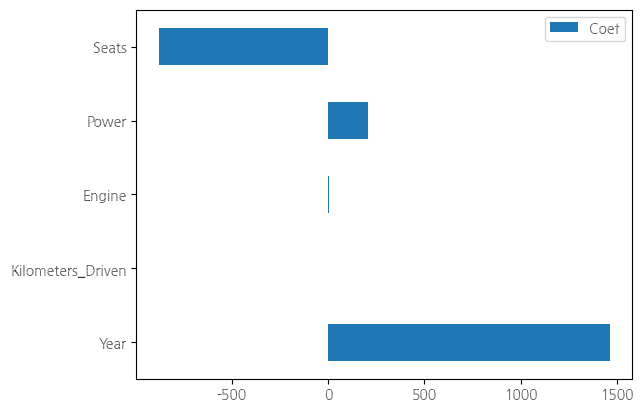

In [268]:
# 설명변수 중요도
df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[1:]},  
                           index = ['Year' , 'Kilometers_Driven' , 'Engine', 'Power', 'Seats'])
df_reg_coef.plot.barh(y = "Coef")

# 2. 의사결정트리

In [49]:
Car_raw = pd.read_csv("/home/piai/Preprocessed_Car.csv")
Car_raw

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Kilometer_Range_Grade
0,AMBASSADOR CLASSIC NOVA DIESEL,Chennai,2069.50,2003,80000,Diesel,Manual,Third,12.80,1489.0,35.5,5.0,AMBASSADOR,CLASSIC NOVA DIESEL,4
1,AUDI A3 35 TDI ATTRACTION,Ahmedabad,26918.78,2014,84004,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,5
2,AUDI A3 35 TDI ATTRACTION,Chennai,25293.84,2014,79271,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,4
3,AUDI A3 35 TDI PREMIUM,Mumbai,29509.48,2016,20003,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM,2
4,AUDI A3 35 TDI PREMIUM PLUS,Mumbai,28972.94,2016,39000,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM PLUS,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7070,VOLVO XC60 D5 INSCRIPTION,Kochi,26336.25,2014,86925,Diesel,Automatic,First,11.20,2400.0,215.0,5.0,VOLVO,XC60 D5 INSCRIPTION,5
7071,VOLVO XC90 2007-2015 D5 AT AWD,Kochi,36147.20,2014,102001,Diesel,Automatic,First,11.10,2400.0,200.0,7.0,VOLVO,XC90 2007-2015 D5 AT AWD,6
7072,VOLVO XC90 2007-2015 D5 AWD,Bangalore,16847.23,2016,70000,Diesel,Manual,First,11.10,2400.0,200.0,7.0,VOLVO,XC90 2007-2015 D5 AWD,4
7073,VOLVO XC90 2007-2015 D5 AWD,Kochi,36254.50,2014,89230,Diesel,Manual,First,11.10,2400.0,200.0,7.0,VOLVO,XC90 2007-2015 D5 AWD,5


In [50]:
Car_raw = Car_raw.drop(["Name","Model"], axis = 1, inplace = False)
Car_raw

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Kilometer_Range_Grade
0,Chennai,2069.50,2003,80000,Diesel,Manual,Third,12.80,1489.0,35.5,5.0,AMBASSADOR,4
1,Ahmedabad,26918.78,2014,84004,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,5
2,Chennai,25293.84,2014,79271,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,4
3,Mumbai,29509.48,2016,20003,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,2
4,Mumbai,28972.94,2016,39000,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7070,Kochi,26336.25,2014,86925,Diesel,Automatic,First,11.20,2400.0,215.0,5.0,VOLVO,5
7071,Kochi,36147.20,2014,102001,Diesel,Automatic,First,11.10,2400.0,200.0,7.0,VOLVO,6
7072,Bangalore,16847.23,2016,70000,Diesel,Manual,First,11.10,2400.0,200.0,7.0,VOLVO,4
7073,Kochi,36254.50,2014,89230,Diesel,Manual,First,11.10,2400.0,200.0,7.0,VOLVO,5


의사결정트리를 만들려고 범주형 변수들의 Dummy화를 시키는 과정에서 Name과 Model 을 더미화 시키면 설명변수가 너무 많아져 제외 시킴

In [51]:
# 범주형 변수의 Dummy 변수화
Car_raw_dummy = pd.get_dummies(Car_raw)
Car_raw_dummy.head()

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Kilometer_Range_Grade,Location_Ahmedabad,Location_Bangalore,...,Brand_MINI,Brand_MITSUBISHI,Brand_NISSAN,Brand_PORSCHE,Brand_RENAULT,Brand_SKODA,Brand_TATA,Brand_TOYOTA,Brand_VOLKSWAGEN,Brand_VOLVO
0,2069.50,2003,80000,12.80,1489.0,35.5,5.0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26918.78,2014,84004,20.38,1968.0,143.0,5.0,5,1,0,...,0,0,0,0,0,0,0,0,0,0
2,25293.84,2014,79271,20.38,1968.0,143.0,5.0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29509.48,2016,20003,20.38,1968.0,143.0,5.0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28972.94,2016,39000,20.38,1968.0,143.0,5.0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# 목표변수, 설명변수 데이터 지정
Car_raw_y = Car_raw_dummy["Price"]
Car_raw_x = Car_raw_dummy.drop(["Price"], axis = 1, inplace = False)

In [53]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(Car_raw_x, Car_raw_y
                                                                , test_size = 0.3, random_state = 1234) 
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (4952, 57)
train data Y size : (4952,)
test data X size : (2123, 57)
test data Y size : (2123,)


## Hyper parameter 조절 안한 의사결정트리

In [54]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.702


## Hyper parameter 조절한 의사결정트리

**min_samples_leaf** 조절

In [55]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = [ ]
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf for n_leaf in range(1, 20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234
                                 , min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

In [56]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.702
1,2,0.970,0.786
2,3,0.944,0.786
3,4,0.916,0.798
4,5,0.900,0.807
5,6,0.892,0.822
6,7,0.875,0.804
7,8,0.867,0.808
8,9,0.863,0.804
9,10,0.850,0.815


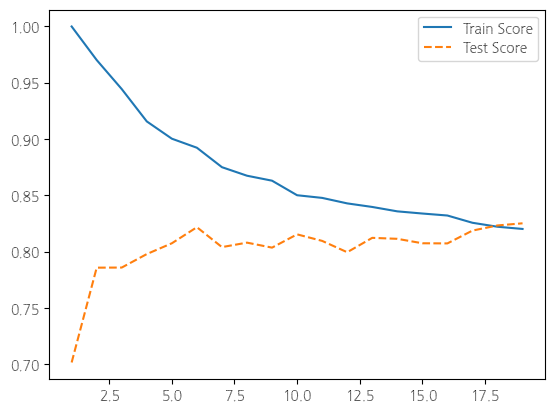

In [57]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.legend()

MinSamplesLeaf = 6

테스트 점수가 0.822로 가장 높습니다. 이는 과적합을 피하면서도 좋은 성능을 보이는 설정입니다.


**MinSamplesSplit** 조절

In [58]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 2 for n_split in range(2, 20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=6
                                 , min_samples_split=v_min_samples_split )
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score


In [59]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.892,0.822
1,6,0.892,0.822
2,8,0.892,0.822
3,10,0.892,0.822
4,12,0.892,0.822
5,14,0.889,0.826
6,16,0.887,0.821
7,18,0.884,0.816
8,20,0.880,0.818
9,22,0.877,0.816


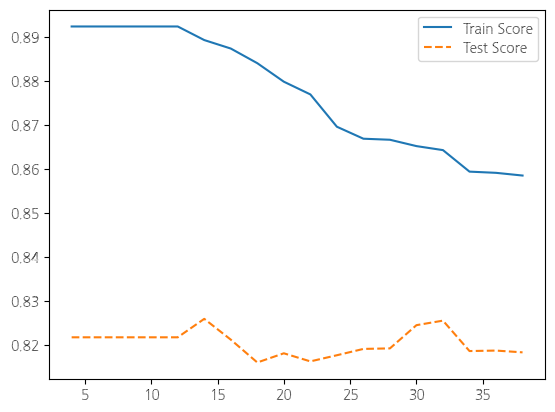

In [60]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.legend()

MinSamplesSplit = 14

테스트 데이터에서 성능이 가장 높았으며, 과적합을 방지하면서도 적절한 설명력을 유지하는 최적의 설정이라고 판단했기 때문입니다. 이 설정은 모델이 더 많은 샘플을 포함하여 분할을 결정하도록 하여, 일반화 성능을 개선하는 데 도움을 줍니다.

**Depth** 조절

In [61]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 20)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=6, min_samples_split=14
                                  , max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

In [62]:
#  모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.473,0.521
1,2,0.597,0.622
2,3,0.702,0.739
3,4,0.760,0.763
4,5,0.804,0.795
5,6,0.841,0.807
6,7,0.861,0.808
7,8,0.871,0.818
8,9,0.878,0.823
9,10,0.883,0.825


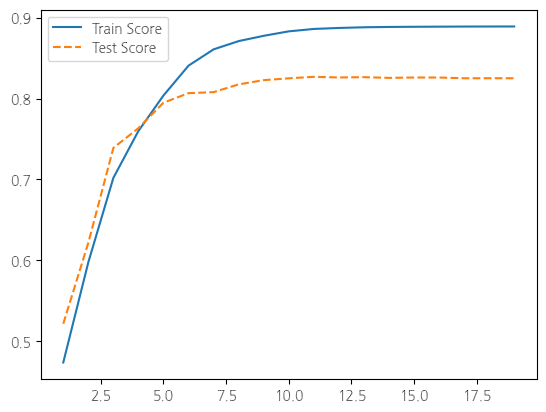

In [63]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.legend()


Depth = 11

테스트 데이터에서 성능이 가장 높았으며, 과적합을 방지하면서도 적절한 설명력을 유지하는 최적의 설정이라고 판단

### Final model

In [64]:
v_feature_name = df_train_x.columns
tree_final = DecisionTreeRegressor(min_samples_leaf = 6, min_samples_split = 14, max_depth = 11, random_state=1234, )
tree_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))

Score on training set: 0.886
Score on test set: 0.827


In [65]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
test_pred = tree_final.predict(df_test_x)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 4825     1532.96
2273     6361.78
3684     5028.11
4337     8584.58
4616     8967.82
1539     8737.87
5917    10562.09
4955     6361.78
3306    13030.16
498     52948.44
Name: Price, dtype: float64
test data의 예측값 : 
 [ 2044.96857143  7032.33292982  4942.70071429  9491.03837838
  7032.33292982  8518.37954545 17517.899375    7427.19
  9226.46490196 32544.74142857]


In [66]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
4,Power,0.698
0,Year,0.185
2,Mileage,0.020
5,Seats,0.017
1,Kilometers_Driven,0.017
12,Location_Hyderabad,0.012
3,Engine,0.011
46,Brand_MERCEDES-BENZ,0.007
24,Owner_Type_First,0.007
29,Brand_AUDI,0.006


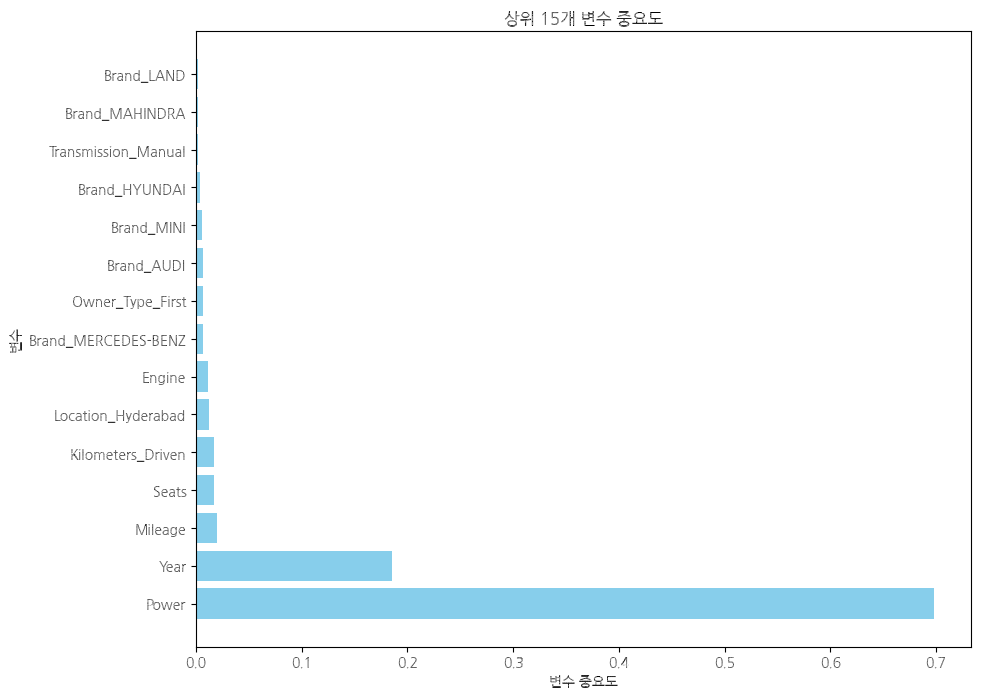

In [67]:
# 중요도를 기준으로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)

# 상위 15개 변수 선택
top_15_importance = df_importance.head(15)

# 그래프 그리기
plt.figure(figsize=(10, 8))
coordinates = range(len(top_15_importance))
plt.barh(y=coordinates, width=top_15_importance["Importance"], color='skyblue')
plt.yticks(coordinates, top_15_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")
plt.title("상위 15개 변수 중요도")
plt.show()

# 3. 랜덤포레스트

In [69]:
Car_raw = pd.read_csv("/home/piai/Preprocessed_Car.csv")
Car_raw

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Kilometer_Range_Grade
0,AMBASSADOR CLASSIC NOVA DIESEL,Chennai,2069.50,2003,80000,Diesel,Manual,Third,12.80,1489.0,35.5,5.0,AMBASSADOR,CLASSIC NOVA DIESEL,4
1,AUDI A3 35 TDI ATTRACTION,Ahmedabad,26918.78,2014,84004,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,5
2,AUDI A3 35 TDI ATTRACTION,Chennai,25293.84,2014,79271,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,4
3,AUDI A3 35 TDI PREMIUM,Mumbai,29509.48,2016,20003,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM,2
4,AUDI A3 35 TDI PREMIUM PLUS,Mumbai,28972.94,2016,39000,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM PLUS,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7070,VOLVO XC60 D5 INSCRIPTION,Kochi,26336.25,2014,86925,Diesel,Automatic,First,11.20,2400.0,215.0,5.0,VOLVO,XC60 D5 INSCRIPTION,5
7071,VOLVO XC90 2007-2015 D5 AT AWD,Kochi,36147.20,2014,102001,Diesel,Automatic,First,11.10,2400.0,200.0,7.0,VOLVO,XC90 2007-2015 D5 AT AWD,6
7072,VOLVO XC90 2007-2015 D5 AWD,Bangalore,16847.23,2016,70000,Diesel,Manual,First,11.10,2400.0,200.0,7.0,VOLVO,XC90 2007-2015 D5 AWD,4
7073,VOLVO XC90 2007-2015 D5 AWD,Kochi,36254.50,2014,89230,Diesel,Manual,First,11.10,2400.0,200.0,7.0,VOLVO,XC90 2007-2015 D5 AWD,5


In [70]:
df= Car_raw.drop(["Name","Model"], axis = 1, inplace = False)

In [74]:
df_dummy = pd.get_dummies(df)

df_y = df_dummy["Price"]
df_x = df_dummy.drop(["Price"], axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234) 

## Hyper parameter 조절 안한 랜덤포레스트

In [73]:
#모델 생성 
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.975
Score on test set: 0.881


## Hyper parameter 조절한 랜덤포레스트

**n_tree** 조절

In [75]:
train_score = []; test_score = []
# # n_estimatos: 트리 수 변경: 1~300
para_n_tree = [n_tree * 10 for n_tree in range(1, 31)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

In [77]:
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.969,0.875
1,20,0.973,0.884
2,30,0.975,0.883
3,40,0.974,0.883
4,50,0.975,0.884
5,60,0.976,0.883
6,70,0.976,0.883
7,80,0.976,0.882
8,90,0.976,0.882
9,100,0.975,0.881


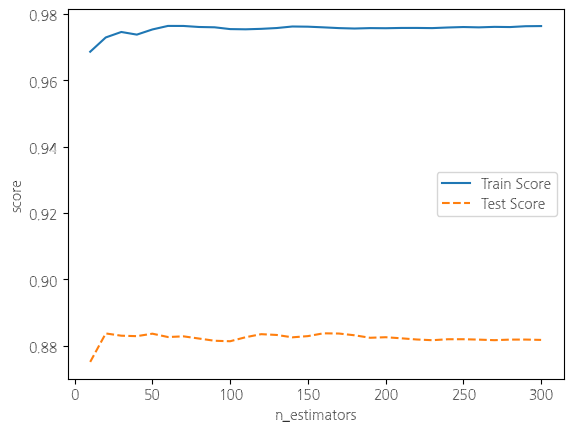

In [79]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

n_estimators = 150

0-300까지 값이 0.001 차이이기 때문에 효율성을 위해 20 선택
-> 20 하면 이후 급히 떨어지기 때문에 150으로 수정  (0.883) 다 고만고만해서

**min_samples_leaf** 조절

In [86]:
train_score = []; test_score = []
# min_samples_leaf: 잎사귀 최소 자료 수 
para_leaf = [n_leaf * 10 for n_leaf in range(1, 20)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=1234,n_estimators =150,  min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,10,0.858,0.850
1,20,0.823,0.839
2,30,0.801,0.825
3,40,0.784,0.813
4,50,0.772,0.804
5,60,0.760,0.794
6,70,0.753,0.789
7,80,0.746,0.781
8,90,0.738,0.771
9,100,0.734,0.767


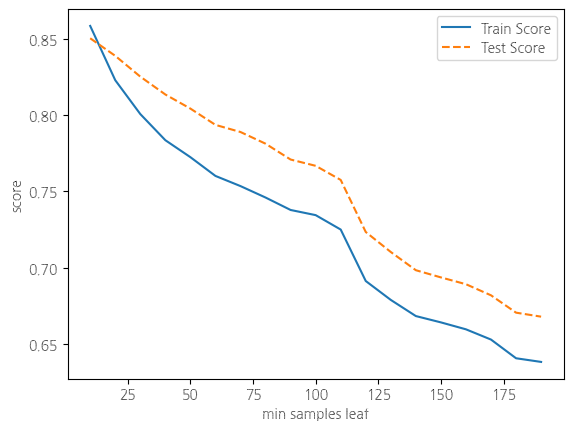

In [87]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

min_samples_leaf = 20

이 그래프에서 min_samples_leaf 값이 작을수록 Train Score와 Test Score가 높아지는 경향을 볼 수 있다.
하지만 너무 작으면 과적합의 위험이 있기 때문에 20으로 선택한다.

**min_samples_split** 조절 

In [88]:
train_score = []; test_score = []

para_split = [n_split * 2 for n_split in range(20, 41)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 150, min_samples_leaf = 20,
                               min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,40,0.823,0.839
1,42,0.822,0.839
2,44,0.821,0.838
3,46,0.820,0.838
4,48,0.819,0.837
5,50,0.817,0.837
6,52,0.816,0.836
7,54,0.814,0.836
8,56,0.813,0.835
9,58,0.811,0.834


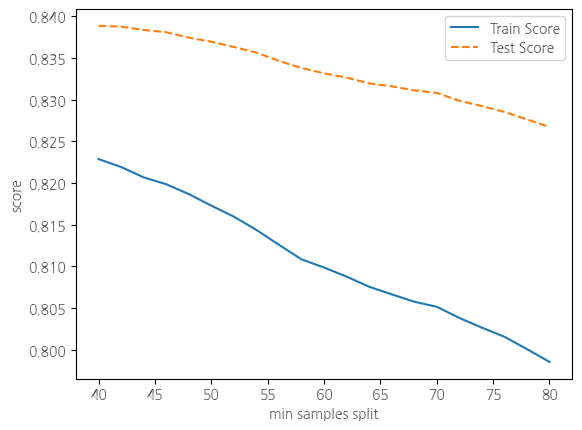

In [89]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()


MinSamplesSplit = 40

train score가 가장 높은 40으로 설정

**Depth** 조절 

In [90]:
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 150,
                               min_samples_leaf = 20, min_samples_split = 40,
                               max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.473,0.521
1,2,0.644,0.676
2,3,0.729,0.761
3,4,0.777,0.804
4,5,0.803,0.828
5,6,0.816,0.836
6,7,0.821,0.838
7,8,0.822,0.838
8,9,0.823,0.839
9,10,0.823,0.839


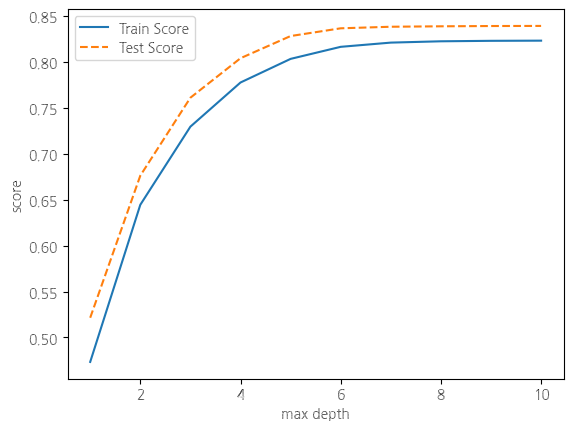

In [91]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

max_depth = 6

max_depth 안정화 구간인 6으로 선택

### Final model

In [92]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators = 150, min_samples_leaf = 20, min_samples_split = 40, max_depth = 6)
rf_final.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))


Score on training set: 0.816
Score on test set: 0.836


In [94]:
test_pred = rf_final.predict(df_test_x)
print('test data의 실제값 : \n', df_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 4825     1532.96
2273     6361.78
3684     5028.11
4337     8584.58
4616     8967.82
1539     8737.87
5917    10562.09
4955     6361.78
3306    13030.16
498     52948.44
Name: Price, dtype: float64
test data의 예측값 : 
 [ 2784.37961969  6824.42980193  4891.67597173  9520.08031765
  7404.64152264  9011.27277928 15807.99969052  6232.84782265
  8178.59138648 52728.72833663]


In [95]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
4,Power,0.759
0,Year,0.171
1,Kilometers_Driven,0.023
3,Engine,0.018
2,Mileage,0.009
5,Seats,0.006
22,Transmission_Automatic,0.004
23,Transmission_Manual,0.003
29,Brand_AUDI,0.003
54,Brand_TOYOTA,0.001


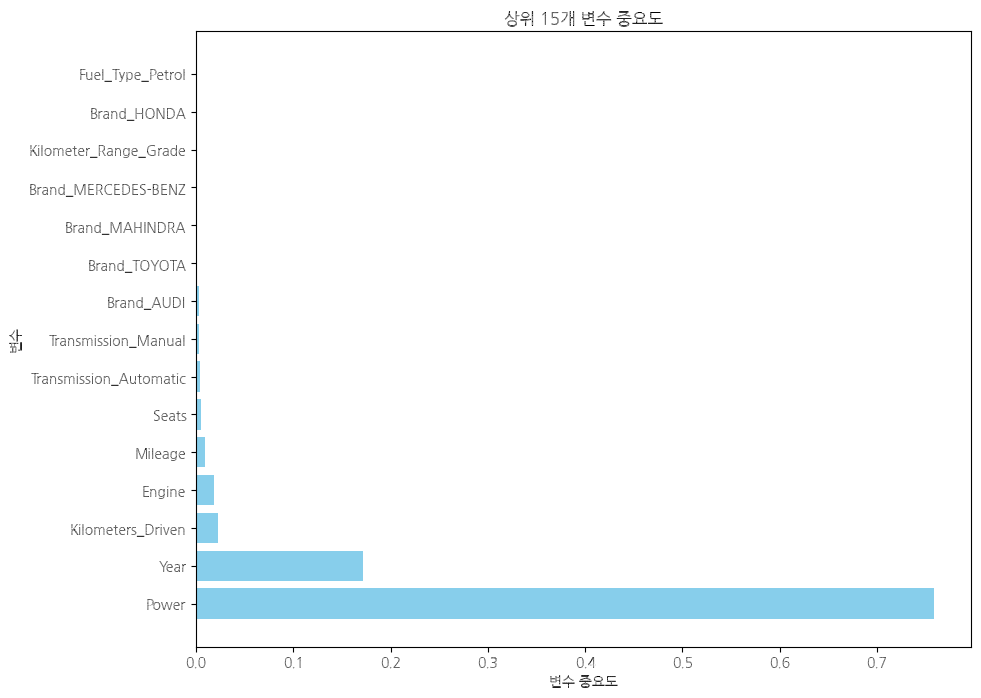

In [96]:
# 중요도를 기준으로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)

# 상위 15개 변수 선택
top_15_importance = df_importance.head(15)

# 그래프 그리기
plt.figure(figsize=(10, 8))
coordinates = range(len(top_15_importance))
plt.barh(y=coordinates, width=top_15_importance["Importance"], color='skyblue')
plt.yticks(coordinates, top_15_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")
plt.title("상위 15개 변수 중요도")
plt.show()

# 4. 그래디언트 부스팅

In [97]:
Car_raw = pd.read_csv("/home/piai/Preprocessed_Car.csv")
Car_raw.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Kilometer_Range_Grade
0,AMBASSADOR CLASSIC NOVA DIESEL,Chennai,2069.50,2003,80000,Diesel,Manual,Third,12.80,1489.0,35.5,5.0,AMBASSADOR,CLASSIC NOVA DIESEL,4
1,AUDI A3 35 TDI ATTRACTION,Ahmedabad,26918.78,2014,84004,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,5
2,AUDI A3 35 TDI ATTRACTION,Chennai,25293.84,2014,79271,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,4
3,AUDI A3 35 TDI PREMIUM,Mumbai,29509.48,2016,20003,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM,2
4,AUDI A3 35 TDI PREMIUM PLUS,Mumbai,28972.94,2016,39000,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM PLUS,2


In [98]:
df= Car_raw.drop(["Name","Model"], axis = 1, inplace = False)

In [102]:
car_raw_dummy = pd.get_dummies(df)

car_raw_y = car_raw_dummy["Price"]
car_raw_x = car_raw_dummy.drop("Price", axis = 1, inplace = False)
car_train_x, car_test_x, car_train_y, car_test_y = train_test_split(car_raw_x, car_raw_y, test_size = 0.3, random_state = 1234)

## Hyper parameter 조절 안한 그래디언트 부스팅

In [103]:
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(car_train_x, car_train_y)
print("Score on training set: {:.3f}".format(gb_uncustomized.score (car_train_x, car_train_y)))
print("Score on test set: {:.3f}".format(gb_uncustomized.score (car_test_x, car_test_y)))

Score on training set: 0.907
Score on test set: 0.888


## Hyper parameter 조절 안한 그래디언트 부스팅

**Estimators** 조절

In [111]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# n_estimatos: 트리 수 변경(10~100)
para_n_tree = [n_tree * 10 for n_tree in range(10, 31)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = v_n_estimators)
    gb.fit(car_train_x, car_train_y)
    train_score.append(gb.score(car_train_x, car_train_y))
    test_score.append(gb.score(car_test_x, car_test_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["Estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)

,Estimators,TrainScore,TestScore
0,100,0.907,0.888
1,110,0.911,0.889
2,120,0.915,0.889
3,130,0.918,0.889
4,140,0.920,0.889
5,150,0.923,0.889
6,160,0.925,0.889
7,170,0.927,0.889
8,180,0.928,0.890
9,190,0.930,0.890


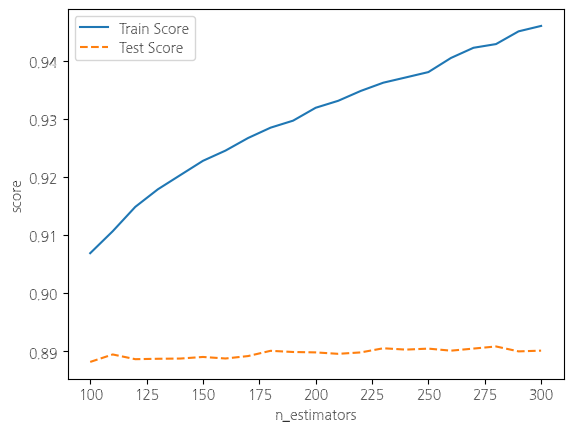

In [112]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()
plt.show()

n_estimators = 180

과적합을 피하기 위해 150-200 사이에서 최적의 값을 선택하는 것이 좋다고 판단됨
그러므로, 180지점에서 테스트 점수가 비교적 높으므로 180을 선택

**min_sample_leaf** 조절

In [107]:
train_score = []; test_score = []
para_leaf = [n_leaf for n_leaf in range(7, 141, 7)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 180,
                                   min_samples_leaf = v_min_samples_leaf)
    gb.fit(car_train_x, car_train_y)
    train_score.append(gb.score(car_train_x, car_train_y))
    test_score.append(gb.score(car_test_x, car_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,7,0.914,0.897
1,14,0.899,0.894
2,21,0.888,0.890
3,28,0.880,0.881
4,35,0.874,0.882
5,42,0.870,0.872
6,49,0.869,0.874
7,56,0.869,0.875
8,63,0.861,0.869
9,70,0.860,0.866


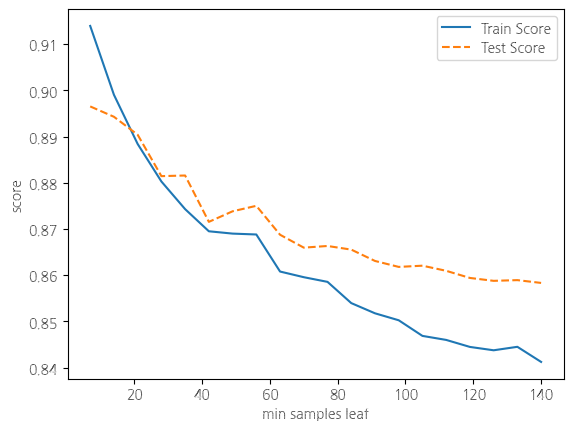

In [109]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()
plt.show()

min_samples_leaf = 67

훈련점수는 잎사귀 수가 증가할수록 점차 낮아지며 140에 도달했을 때 0.841로 감소된다. 이는 갯수에 포함된 샘플 수가 많아질수록 데이터를 덜 세부적으로 학습하면서 과적합이 줄어들고 있다고 판단된다.
테스트 점수는 20에서 100사이 구간에서는 약간의 변동을 보이면서 안정적으로 유지된다. 100 이상일때는 테스트 점수가 조금씩 감소하는 경향이 보인다.
결론으론 값을 35에서 70사이로 설정하는 것이 테스트 점수와 훈련 점수의 차이가 적고 테스트 점수도 높은 수준으로 안정적이다.
그러므로 67정도를 선택

**MinSamplesSplit** 조절

In [114]:
train_score = []; test_score = []
para_split = [n_split * 20 for n_split in range(2, 18)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 180, min_samples_leaf = 67,
                                   min_samples_split = v_min_samples_split)
    gb.fit(car_train_x, car_train_y)
    train_score.append(gb.score(car_train_x, car_train_y))
    test_score.append(gb.score(car_test_x, car_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,40,0.859,0.868
1,60,0.859,0.868
2,80,0.859,0.868
3,100,0.859,0.868
4,120,0.859,0.868
5,140,0.859,0.868
6,160,0.858,0.868
7,180,0.859,0.867
8,200,0.859,0.868
9,220,0.858,0.868


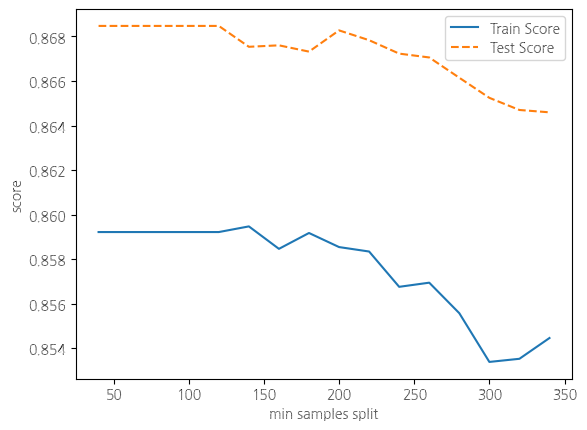

In [115]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()
plt.show()

min_samples_split = 40

40에서 140까지 훈련 점수와 테스트 점수가 변하지 않고 일관되게 유지되므로 40을 선택

**Depth** 조절

In [116]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(4, 16)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 180, min_samples_leaf = 67,
                                   min_samples_split = 40, max_depth = v_max_depth)
    gb.fit(car_train_x, car_train_y)
    train_score.append(gb.score(car_train_x, car_train_y))
    test_score.append(gb.score(car_test_x, car_test_y))

# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,4,0.871,0.868
1,5,0.877,0.869
2,6,0.877,0.866
3,7,0.880,0.866
4,8,0.883,0.867
5,9,0.885,0.868
6,10,0.887,0.868
7,11,0.889,0.869
8,12,0.890,0.869
9,13,0.891,0.870


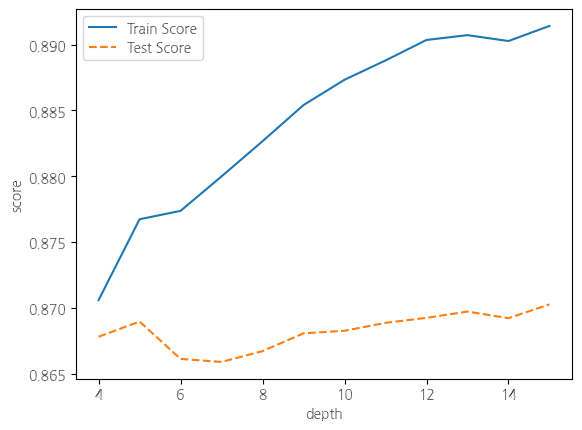

In [117]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("depth")
plt.legend()
plt.show()

para_depth = 10

훈련 점수는 깊이가 깊어질수록 증가하지만, 테스트 점수는 13이후로 거의 변화하지 않고 일정하게 유지됨
깊이 13과 15에서 테스트 점수가 가장 높고, 훈련 점수도 높지만 과적합 가능성이 커짐
그러므로 10을 고름


**LearningRate** 조절

In [118]:
train_score = []; test_score = []
para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 180, min_samples_leaf = 67,
                                   min_samples_split = 40, max_depth = 10, learning_rate = v_learning_rate)
    gb.fit(car_train_x, car_train_y)
    train_score.append(gb.score(car_train_x, car_train_y))
    test_score.append(gb.score(car_test_x, car_test_y))

df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score

df_score_lr.round(3)


,LearningRate,TrainScore,TestScore
0,0.1,0.887,0.868
1,0.2,0.918,0.870
2,0.3,0.934,0.875
3,0.4,0.945,0.872
4,0.5,0.956,0.870
5,0.6,0.961,0.866
6,0.7,0.969,0.862
7,0.8,0.970,0.862
8,0.9,0.976,0.860


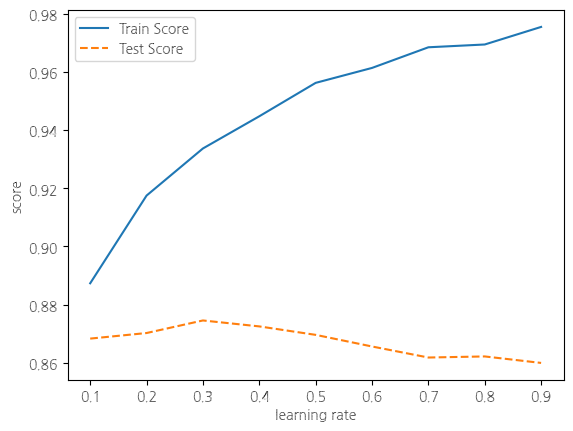

In [119]:
plt.plot(para_lr, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_lr, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("learning rate")
plt.legend()
plt.show()

LearningRate = 0.3

테스트 점수는 0.3일때 최고치이며 값이 증가될수록 훈련 점수는 상승하지만 테스트 점수는 감소함

0.4 이상일 때 훈련 점수는 높아지지만 오히려 떨어지므로 과적합이 발생될 가능성이 있음
그러므로 0.3이 가장 적합한 선택이라고 판단됨

### Final model

In [120]:
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators = 180, min_samples_leaf = 67,
                                   min_samples_split = 40, max_depth = 10, learning_rate = 0.3)
gb_final.fit(car_train_x, car_train_y)
print("Score on training set: {:.3f}".format(gb_final.score(car_train_x, car_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(car_test_x, car_test_y)))

Score on training set: 0.934
Score on test set: 0.875


In [121]:
test_pred =gb_final.predict(car_test_x)
print('test data의 실제값 : \n', car_test_y[:10])
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 4825     1532.96
2273     6361.78
3684     5028.11
4337     8584.58
4616     8967.82
1539     8737.87
5917    10562.09
4955     6361.78
3306    13030.16
498     52948.44
Name: Price, dtype: float64
test data의 예측값 : 
 [ 1704.21796107  7123.3519236   6141.20318938 10229.88951543
  9099.50359126  8510.03963338 15286.49742963  5733.3352261
  8005.40031343 44421.61126817]


In [122]:
v_feature_name = car_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)


,Feature,Importance
4,Power,0.699
0,Year,0.153
1,Kilometers_Driven,0.049
3,Engine,0.034
2,Mileage,0.025
23,Transmission_Manual,0.009
46,Brand_MERCEDES-BENZ,0.006
5,Seats,0.005
29,Brand_AUDI,0.003
21,Fuel_Type_Petrol,0.002


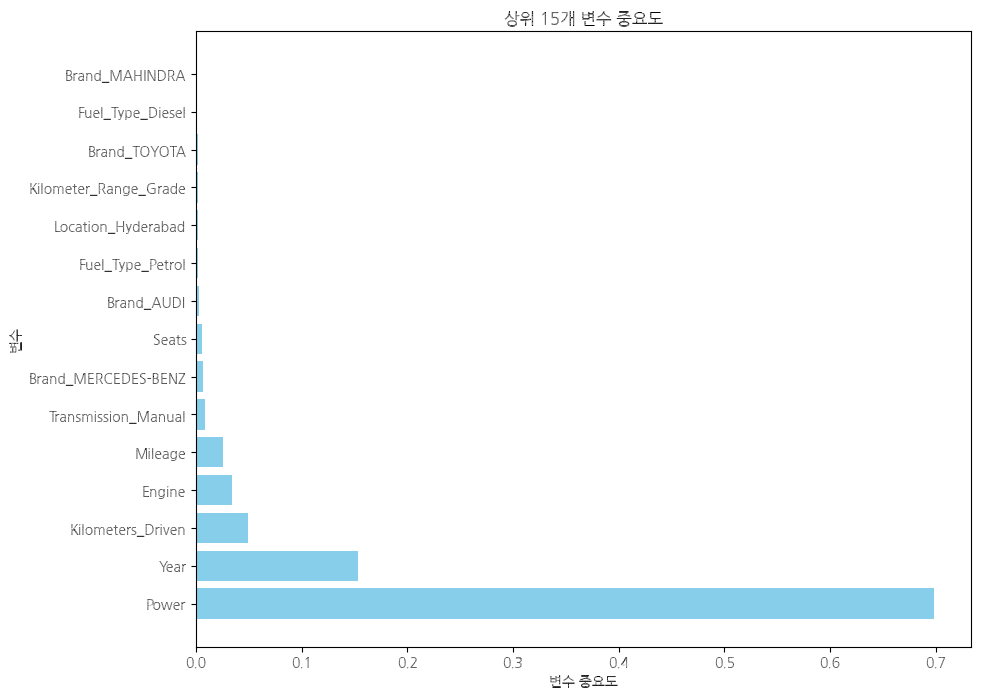

In [126]:
# 중요도를 기준으로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)

# 상위 15개 변수 선택
top_15_importance = df_importance.head(15)

# 그래프 그리기
plt.figure(figsize=(10, 8))
coordinates = range(len(top_15_importance))
plt.barh(y=coordinates, width=top_15_importance["Importance"], color='skyblue')
plt.yticks(coordinates, top_15_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")
plt.title("상위 15개 변수 중요도")
plt.show()

# 자동 (RandomizedSearchCV )

In [280]:
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

# 데이터 구성:Series, DataFrame
import pandas as pd

# 배열 구성
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# export_graphviz: 나무 구조 생성 및 저장 
from sklearn.tree import export_graphviz

# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split

# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor

# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor

# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# 맑은 고딕 적용
matplotlib.rc("font", family = "NanumGothic Eco")
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)


In [269]:
# 데이터 불러오기
Car_raw = pd.read_csv("Preprocessed_Car.csv", encoding='euc-kr')
Car_raw.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Kilometer_Range_Grade
0,AMBASSADOR CLASSIC NOVA DIESEL,Chennai,2069.50,2003,80000,Diesel,Manual,Third,12.80,1489.0,35.5,5.0,AMBASSADOR,CLASSIC NOVA DIESEL,4
1,AUDI A3 35 TDI ATTRACTION,Ahmedabad,26918.78,2014,84004,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,5
2,AUDI A3 35 TDI ATTRACTION,Chennai,25293.84,2014,79271,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,4
3,AUDI A3 35 TDI PREMIUM,Mumbai,29509.48,2016,20003,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM,2
4,AUDI A3 35 TDI PREMIUM PLUS,Mumbai,28972.94,2016,39000,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM PLUS,2


In [270]:
Car_raw.drop(columns=['Model', 'Name'], inplace=True)

In [271]:
Car_raw_dummy = pd.get_dummies(Car_raw)
Car_raw_dummy

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Kilometer_Range_Grade,Location_Ahmedabad,Location_Bangalore,...,Brand_MINI,Brand_MITSUBISHI,Brand_NISSAN,Brand_PORSCHE,Brand_RENAULT,Brand_SKODA,Brand_TATA,Brand_TOYOTA,Brand_VOLKSWAGEN,Brand_VOLVO
0,2069.50,2003,80000,12.80,1489.0,35.5,5.0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26918.78,2014,84004,20.38,1968.0,143.0,5.0,5,1,0,...,0,0,0,0,0,0,0,0,0,0
2,25293.84,2014,79271,20.38,1968.0,143.0,5.0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29509.48,2016,20003,20.38,1968.0,143.0,5.0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28972.94,2016,39000,20.38,1968.0,143.0,5.0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7070,26336.25,2014,86925,11.20,2400.0,215.0,5.0,5,0,0,...,0,0,0,0,0,0,0,0,0,1
7071,36147.20,2014,102001,11.10,2400.0,200.0,7.0,6,0,0,...,0,0,0,0,0,0,0,0,0,1
7072,16847.23,2016,70000,11.10,2400.0,200.0,7.0,4,0,1,...,0,0,0,0,0,0,0,0,0,1
7073,36254.50,2014,89230,11.10,2400.0,200.0,7.0,5,0,0,...,0,0,0,0,0,0,0,0,0,1


In [272]:
# 데이터셋 분리
# train/test data 분리
# X와 Y를 나누기 (예: 목표 변수 컬럼이 "Y"인 경우)
X = Car_raw_dummy.drop("Price", axis=1) # 설명 변수
Y = Car_raw_dummy["Price"] # 목표 변수

# train_test_split을 통해 훈련/테스트 세트 나누기
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(X, Y, test_size=0.3, random_state=1234)

# 훈련 및 테스트 세트 인덱스 리셋
df_train_x = df_train_x.reset_index(drop=True)
df_test_x = df_test_x.reset_index(drop=True)
df_train_y = df_train_y.reset_index(drop=True)
df_test_y = df_test_y.reset_index(drop=True)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))


train data X size : (4952, 57)
train data Y size : (4952,)
test data X size : (2123, 57)
test data Y size : (2123,)


In [274]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 1. 의사결정트리

In [277]:
# RandomizedSearchCV를 이용한 최적 parameter로 커스텀
estimator = DecisionTreeRegressor()

# 구하고자 하는 parameter와 범위
param_grid = {"criterion": ["squared_error", "friedman_mse", "absolute_error"], 
              "max_features": [None, "sqrt", "log2"],
              "max_depth": [depth for depth in range(1, 30)], 
              "min_samples_split": [n_split for n_split in range(2, 50)],
              "min_samples_leaf": [n_leaf for n_leaf in range(1, 30)]}

# 설명력이 높은 최적 parameter 찾기
rand_dt = RandomizedSearchCV(estimator, 
                             param_distributions=param_grid,
                             n_iter=1000,
                             scoring="r2", 
                             n_jobs=-1, 
                             random_state=1234)
rand_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(rand_dt.best_estimator_))
print("\nbest parameter: \n{}".format(rand_dt.best_params_))
print("\nbest score: \n{}".format(rand_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeRegressor(criterion='absolute_error', max_depth=11,
                      min_samples_leaf=7, min_samples_split=23)

best parameter: 
{'min_samples_split': 23, 'min_samples_leaf': 7, 'max_features': None, 'max_depth': 11, 'criterion': 'absolute_error'}

best score: 
0.777


In [ ]:
# 최적 parameter를 적용한 모델 생성 및 평가
rand_cv_dt= DecisionTreeRegressor(criterion='absolute_error', max_depth=11,
                      min_samples_leaf=7, min_samples_split=23, random_state=1234)

rand_cv_dt.fit(df_train_x, df_train_y)
rand_cv_dt.get_params()

In [ ]:
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rand_cv_dt.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(rand_cv_dt.score(df_test_x, df_test_y)))

In [ ]:
# rand_cv_dt_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rand_cv_dt.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)


Text(0, 0.5, '변수')

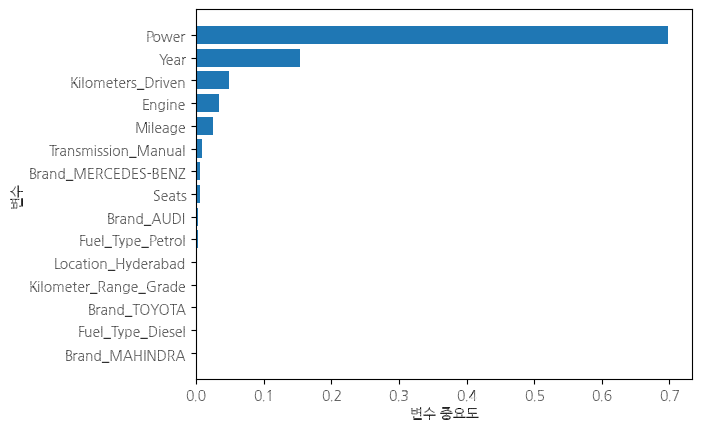

In [281]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)

df_top = df_importance.tail(15)
coordinates = range(len(df_top))
plt.barh(y=coordinates, width=df_top["Importance"])
plt.yticks(coordinates, df_top["Feature"]) 
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# 2. 랜덤포레스트

In [ ]:
# RandomizedSearchCV를 이용한 최적 parameter로 커스텀
estimator = RandomForestRegressor()

# 구하고자 하는 parameter와 범위
param_grid = {"criterion": ["squared_error", "friedman_mse", "absolute_error"], 
              "max_features": [None, "sqrt", "log2"],
              "n_estimators" : [estimators for estimators in range(50, 500)],
              "max_depth": [depth for depth in range(1, 30)], 
              "min_samples_split": [n_split for n_split in range(2, 50)],
              "min_samples_leaf": [n_leaf for n_leaf in range(1, 30)]}

# 설명력이 높은 최적 parameter 찾기
rand_rf = RandomizedSearchCV(estimator, 
                             param_distributions=param_grid,
                             n_iter=1000,
                             scoring="r2", 
                             n_jobs=-1, 
                             random_state=1234)
rand_rf.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(rand_rf.best_estimator_))
print("\nbest parameter: \n{}".format(rand_rf.best_params_))
print("\nbest score: \n{}".format(rand_rf.best_score_.round(3)))

In [290]:
# 최적 parameter를 적용한 모델 생성 및 평가
rand_cv_rf = RandomForestRegressor(max_depth=13, max_features=None, min_samples_leaf=2,
                      n_estimators=329, random_state=1234)
rand_cv_rf.fit(df_train_x, df_train_y)

rand_cv_rf.fit(df_train_x, df_train_y)
rand_cv_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 13,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 329,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

In [291]:
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rand_cv_rf.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rand_cv_rf.score(df_test_x, df_test_y)))


Score on training set: 0.949
Score on test set: 0.880


In [292]:
# rand_cv_rf_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rand_cv_rf.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
4,Power,0.650
0,Year,0.161
1,Kilometers_Driven,0.047
2,Mileage,0.035
3,Engine,0.026
43,Brand_LAND,0.013
5,Seats,0.009
12,Location_Hyderabad,0.008
46,Brand_MERCEDES-BENZ,0.006
29,Brand_AUDI,0.006


Text(0, 0.5, '변수')

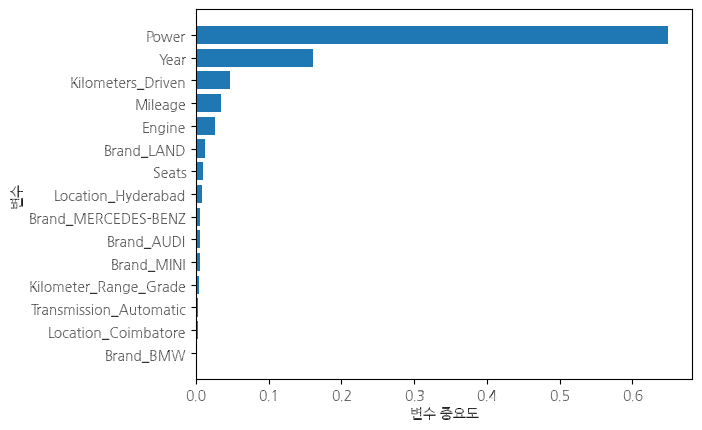

In [293]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)

df_top = df_importance.tail(15)
coordinates = range(len(df_top))
plt.barh(y=coordinates, width=df_top["Importance"])
plt.yticks(coordinates, df_top["Feature"]) 
plt.xlabel("변수 중요도")
plt.ylabel("변수")



# 3. 그래디언트 부스팅

In [283]:
# RandomizedSearchCV를 이용한 최적 parameter로 커스텀
estimator = GradientBoostingRegressor()

# 구하고자 하는 parameter와 범위
param_grid = {"criterion": ["friedman_mse", "squared_error"], 
              "max_features": [None, "sqrt", "log2"], 
              "n_estimators" : [estimators for estimators in range(50, 500)], 
              "max_depth": [depth for depth in range(1, 30)], 
              "min_samples_split": [n_split for n_split in range(2, 50)], 
              "min_samples_leaf": [n_leaf for n_leaf in range(1, 30)],
              "learning_rate": [lr * 0.02 for lr in range(1, 20)]}

# 설명력이 높은 최적 parameter 찾기
rand_gb = RandomizedSearchCV(estimator,
                             param_distributions=param_grid,
                             n_iter=1000,
                             scoring="r2",
                             n_jobs=-1,
                             random_state=1234)
rand_gb.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(rand_gb.best_estimator_))
print("\nbest parameter: \n{}".format(rand_gb.best_params_))
print("\nbest score: \n{}".format(rand_gb.best_score_.round(3)))



KeyboardInterrupt: 

In [294]:
# 최적 parameter를 적용한 모델 생성 및 평가
rand_cv_gb= GradientBoostingRegressor(criterion='squared_error', learning_rate=0.06,
                          max_depth=16, max_features='sqrt',
                          min_samples_leaf=15, min_samples_split=5,
                          n_estimators=435, random_state=1234)

rand_cv_gb.fit(df_train_x, df_train_y)
rand_cv_gb.get_params()


{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'init': None,
 'learning_rate': 0.06,
 'loss': 'squared_error',
 'max_depth': 16,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 15,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 435,
 'n_iter_no_change': None,
 'random_state': 1234,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [295]:
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rand_cv_gb.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(rand_cv_gb.score(df_test_x, df_test_y)))


Score on training set: 0.973
Score on test set: 0.900


In [296]:
# rand_cv_gb_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rand_cv_gb.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
4,Power,0.243
3,Engine,0.165
23,Transmission_Manual,0.098
0,Year,0.088
2,Mileage,0.075
1,Kilometers_Driven,0.063
22,Transmission_Automatic,0.056
46,Brand_MERCEDES-BENZ,0.034
19,Fuel_Type_Diesel,0.031
6,Kilometer_Range_Grade,0.021


Text(0, 0.5, '변수')

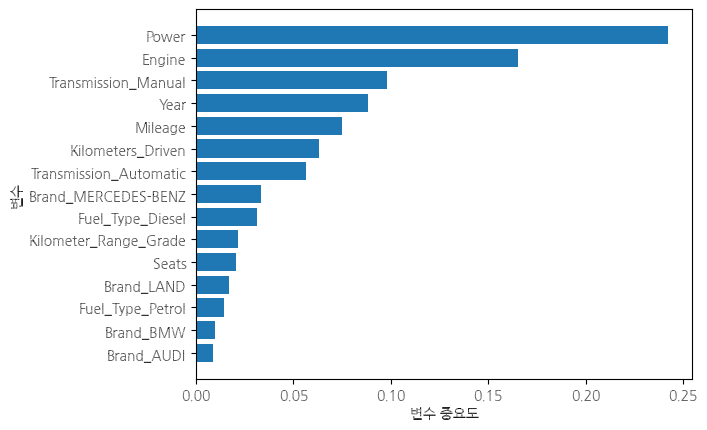

In [298]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)

# 상위 5개 변수 선택
df_top = df_importance.tail(15)
coordinates = range(len(df_top))
plt.barh(y=coordinates, width=df_top["Importance"])
plt.yticks(coordinates, df_top["Feature"]) 
plt.xlabel("변수 중요도")
plt.ylabel("변수")



# 모델링 성능 평가

In [300]:
import matplotlib

# 맑은 고딕 적용
matplotlib.rc("font", family = "NanumGothic")
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)

# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

# 데이터 구성:Series, DataFrame
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split

# 회귀분석
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# 최적 parameter 찾기
from sklearn.model_selection import RandomizedSearchCV

# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [302]:
Car_raw = pd.read_csv("/home/piai/Preprocessed_Car.csv", encoding='euc-kr')
Car_raw.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Kilometer_Range_Grade
0,AMBASSADOR CLASSIC NOVA DIESEL,Chennai,2069.50,2003,80000,Diesel,Manual,Third,12.80,1489.0,35.5,5.0,AMBASSADOR,CLASSIC NOVA DIESEL,4
1,AUDI A3 35 TDI ATTRACTION,Ahmedabad,26918.78,2014,84004,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,5
2,AUDI A3 35 TDI ATTRACTION,Chennai,25293.84,2014,79271,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI ATTRACTION,4
3,AUDI A3 35 TDI PREMIUM,Mumbai,29509.48,2016,20003,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM,2
4,AUDI A3 35 TDI PREMIUM PLUS,Mumbai,28972.94,2016,39000,Diesel,Automatic,First,20.38,1968.0,143.0,5.0,AUDI,A3 35 TDI PREMIUM PLUS,2


In [303]:
Car_raw.drop(columns=['Model', 'Name'], inplace=True)

In [304]:
Car_raw_dummy = pd.get_dummies(Car_raw)
Car_raw_dummy

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Kilometer_Range_Grade,Location_Ahmedabad,Location_Bangalore,...,Brand_MINI,Brand_MITSUBISHI,Brand_NISSAN,Brand_PORSCHE,Brand_RENAULT,Brand_SKODA,Brand_TATA,Brand_TOYOTA,Brand_VOLKSWAGEN,Brand_VOLVO
0,2069.50,2003,80000,12.80,1489.0,35.5,5.0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26918.78,2014,84004,20.38,1968.0,143.0,5.0,5,1,0,...,0,0,0,0,0,0,0,0,0,0
2,25293.84,2014,79271,20.38,1968.0,143.0,5.0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29509.48,2016,20003,20.38,1968.0,143.0,5.0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28972.94,2016,39000,20.38,1968.0,143.0,5.0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7070,26336.25,2014,86925,11.20,2400.0,215.0,5.0,5,0,0,...,0,0,0,0,0,0,0,0,0,1
7071,36147.20,2014,102001,11.10,2400.0,200.0,7.0,6,0,0,...,0,0,0,0,0,0,0,0,0,1
7072,16847.23,2016,70000,11.10,2400.0,200.0,7.0,4,0,1,...,0,0,0,0,0,0,0,0,0,1
7073,36254.50,2014,89230,11.10,2400.0,200.0,7.0,5,0,0,...,0,0,0,0,0,0,0,0,0,1


In [305]:
# 데이터셋 분리
# train/test data 분리
# X와 Y를 나누기 (예: 목표 변수 컬럼이 "Y"인 경우)
X = Car_raw_dummy.drop("Price", axis=1) # 설명 변수
Y = Car_raw_dummy["Price"] # 목표 변수

# train_test_split을 통해 훈련/테스트 세트 나누기
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(X, Y, test_size=0.3, random_state=1234)

# 훈련 및 테스트 세트 인덱스 리셋
df_train, df_test = train_test_split(Car_raw_dummy, test_size = 0.3, random_state = 1234) 
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

df_train_x = df_train_x.reset_index(drop=True)
df_test_x = df_test_x.reset_index(drop=True)
df_train_y = df_train_y.reset_index(drop=True)
df_test_y = df_test_y.reset_index(drop=True)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data size : (4952, 58)
test data size : (2123, 58)
train data X size : (4952, 57)
train data Y size : (4952,)
test data X size : (2123, 57)
test data Y size : (2123,)


In [306]:
# 변수명 저장
v_feature_name = df_train_x.columns

In [307]:
# 각 모델 생성
# 회귀 모델
reg_model = smf.ols(formula = "Price ~ Year+ Kilometers_Driven + Engine + Power + Seats", data = df_train)
reg_result = reg_model.fit()

# Decision Tree
dt_model = DecisionTreeRegressor(criterion='absolute_error', max_depth=11, 
                                 min_samples_leaf=7, min_samples_split=23, random_state=1234)
dt_model.fit(df_train_x, df_train_y)

# Random Forest
rf_model = RandomForestRegressor(max_depth=13, max_features=None, min_samples_leaf=2, 
                                 n_estimators=329, random_state=1234)
rf_model.fit(df_train_x, df_train_y)

# Gradient Boosting
gb_model = GradientBoostingRegressor(criterion='squared_error', learning_rate=0.06, 
                                     max_depth=16, max_features='sqrt', 
                                     min_samples_leaf=15, min_samples_split=5, 
                                     n_estimators=435, random_state=1234)
gb_model.fit(df_train_x, df_train_y)


GradientBoostingRegressor(criterion='squared_error', learning_rate=0.06,
                          max_depth=16, max_features='sqrt',
                          min_samples_leaf=15, min_samples_split=5,
                          n_estimators=435, random_state=1234)

In [308]:
# 모델 리스트 및 그래프를 그리기 생성 목적
models = ["회귀 분석", "의사결정나무", "랜덤 포레스트", "그래디언트 부스팅"]
# 평가 리스트 초기화
mse, rmse, mae, mape = [],[],[],[]

# 회귀분석예측 - 테스트 데이터의 필요한 열만 사용하고 절편 추가
# Statsmodels에서 회귀 모델을 사용할 때는 절편 추가 필요
df_test_subset = df_test[['Year', 'Kilometers_Driven', 'Engine', 'Power', 'Seats']]
df_test_subset = sm.add_constant(df_test_subset)

# 회귀분석예측
reg_y_pred = reg_result.predict(df_test_subset)

# 평가
mse.append(mean_squared_error(df_test['Price'], reg_y_pred))
rmse.append(mean_squared_error(df_test['Price'], reg_y_pred, squared=False))
mae.append(mean_absolute_error(df_test['Price'], reg_y_pred))
mape.append(mean_absolute_percentage_error(df_test['Price'], reg_y_pred))

# 의사결정나무 예측
dt_y_pred = dt_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(mean_squared_error(df_test_y, dt_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

# 랜덤포레스트 예측
rf_y_pred = rf_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(mean_squared_error(df_test_y, rf_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

# 그래디언트부스팅 예측
gb_y_pred = gb_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(mean_squared_error(df_test_y, gb_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))


In [310]:
# 모델 별 MSE, RMSE, MAE, MAPE
model_val = {
    'OLS Regression' : [mse[0], rmse[0], mae[0], mape[0]],
    'Decision Tree' : [mse[1], rmse[1], mae[1], mape[1]],
    'Random Forest' : [mse[2], rmse[2], mae[2], mape[2]],
    'Gradient Boosting' : [mse[3], rmse[3], mae[3], mape[3]]}

# DataFrame 생성 시 index 인자를 통해 행 인덱스 지정
df_model_val = pd.DataFrame(model_val, index=['MSE', 'RMSE', 'MAE', 'MAPE'])

# 결과 출력
df_model_val.round(2)

,OLS Regression,Decision Tree,Random Forest,Gradient Boosting
MSE,95340011.60,47020093.04,33216024.23,27616703.54
RMSE,9764.22,6857.12,5763.33,5255.16
MAE,5986.70,3136.65,2628.23,2471.73
MAPE,0.78,0.23,0.21,0.20


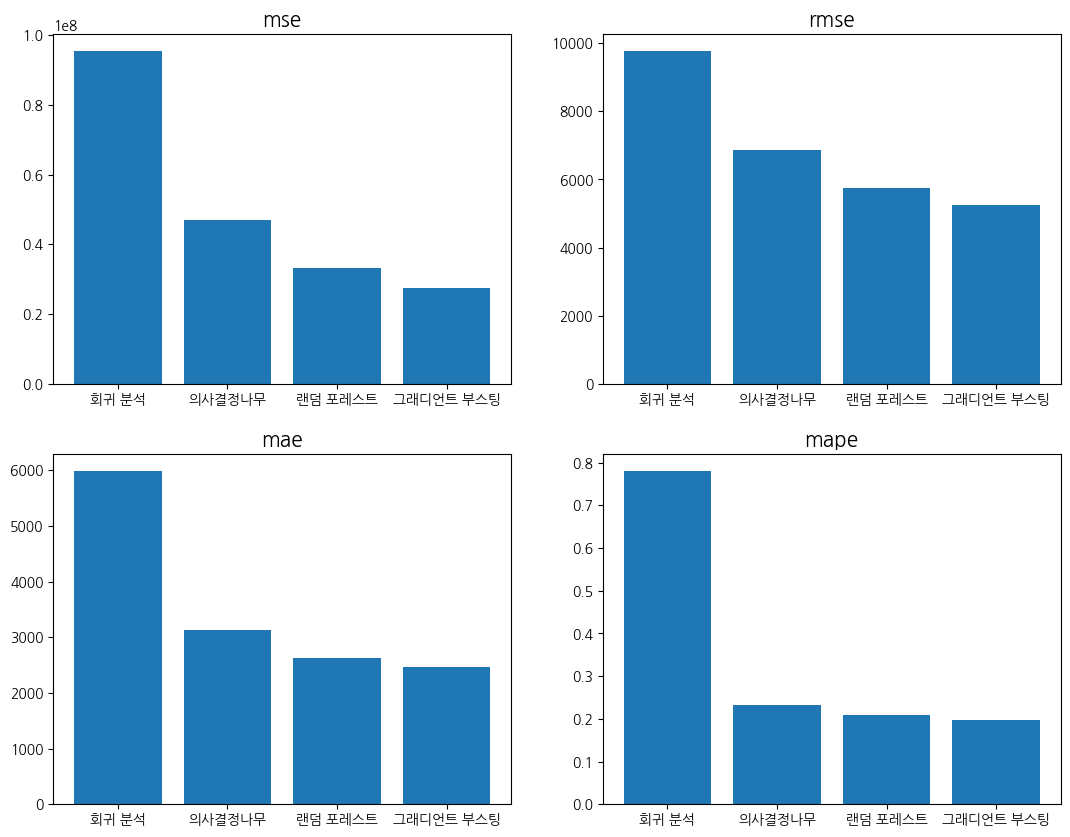

In [311]:
# 시각화
fig, ax = plt.subplots(2,2, figsize = (13,10))
ax[0, 0].bar(models, mse)
ax[0, 0].set_title("mse").set_fontsize(15)

ax[0, 1].bar(models, rmse)
ax[0, 1].set_title("rmse").set_fontsize(15)

ax[1, 0].bar(models, mae)
ax[1, 0].set_title("mae").set_fontsize(15)

ax[1, 1].bar(models, mape)
ax[1, 1].set_title("mape").set_fontsize(15)

회귀 모델의 평가 기준은 MSE, RMSE, MAE, MAPE 4가지이며 값이 낮을 수록 좋은 모델이다.
이 4가지 기준을 통해 Gradient Boosting > Random Forest > Decesion Tree > OLS Regression 순으로 성능이 차이가 난다는 것을 확인할 수 있다.
그러므로 중고차 가격 예측 모델 개발을 위해서는 그래디언트 부스팅 모델이 가장 적합하다고 판단할 수 있다.